# EDA RawData Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
emp = pd.read_excel(r'C:\Users\akash\OneDrive\Desktop\FSDS\EDA\RawData.xlsx')
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [3]:
id(emp)

1446602182672

In [4]:
emp.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [5]:
emp.shape

(6, 6)

In [6]:
emp.dtypes

Name        object
Domain      object
Age         object
Location    object
Salary      object
Exp         object
dtype: object

In [7]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [8]:
emp.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [9]:
emp.tail()

,Name,Domain,Age,Location,Salary,Exp
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [10]:
emp.isna()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [11]:
emp.isnull()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [12]:
emp.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [13]:
emp.describe()

,Name,Domain,Age,Location,Salary,Exp
count,6,6,4,4,6,5
unique,6,6,4,4,6,5
top,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
freq,1,1,1,1,1,1


# Data Cleaning or Data Cleansing

In [14]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [15]:
emp['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

### Meaning of the pattern \W

- \W = NOT word characters
- Word characters = `[A-Z, a-z, 0-9_]`

So `\W removes everything except letters, digits, and underscore “_”.`

### Why use regex=True?

- Because we are using a regular expression `(\W)`.
- Without `regex=True`, Pandas will treat \W like a normal string.

In [16]:
emp['Name'] = emp['Name'].str.replace(r'\W', '', regex = True)

In [17]:
emp['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [18]:
emp['Domain'] = emp['Domain'].str.replace(r'\W', '', regex = True)

In [19]:
emp['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [20]:
emp['Location'] = emp['Location'].str.replace(r'\W','', regex=True)

In [21]:
emp['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [22]:
emp['Age'] = emp['Age'].str.replace(r'\W', '', regex=True)

In [23]:
emp['Age']

0    34years
1       45yr
2        NaN
3        NaN
4       67yr
5       55yr
Name: Age, dtype: object

### 🔍 Meaning of the regex (\d+)

- `\d → digit (0 to 9)`
- `+ → one or more digits`
- `( ) → capturing group (extract this part)`

So (\d+) means:
👉 Find a continuous sequence of digits and extract it.

### ❗Note
- `The result will be string type.`
- To convert into integer use `astype(int)`

In [24]:
emp['Age'] = emp['Age'].str.extract('(\\d+)')

In [25]:
emp['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [26]:
emp['Salary'] = emp['Salary'].str.replace(r'\W','',regex=True)

In [27]:
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [28]:
emp['Exp'] = emp['Exp'].str.extract('(\\d+)')

In [29]:
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

# DataSet after Cleaning

In [30]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [31]:
clean_data = emp.copy()

In [32]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [42]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [47]:
clean_data['Age'] = clean_data['Age'].astype(int) 
# we applied the extract() on Age it is become string 
# so to get Int type apply .astype(int)

In [48]:
clean_data['Salary'] = clean_data['Salary'].astype(int)

In [49]:
clean_data['Exp'] = clean_data['Exp'].astype(int)

In [50]:
clean_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int64 
 3   Location  6 non-null      object
 4   Salary    6 non-null      int64 
 5   Exp       6 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 420.0+ bytes


In [51]:
clean_data['Name'] = clean_data['Name'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Location'] = clean_data['Location'].astype('category')

In [52]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int64   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int64   
 5   Exp       6 non-null      int64   
dtypes: category(3), int64(3)
memory usage: 938.0 bytes


In [53]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [54]:
clean_data.to_csv('clean_data.csv')

In [56]:
import os
os.getcwd()

'C:\\Users\\akash'

# EDA Techniques Applying
## `1. Missing Values Treatments`

In [57]:
clean_data['Age'] = clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))

In [58]:
clean_data['Age']

0    34
1    45
2    50
3    50
4    67
5    55
Name: Age, dtype: int64

In [61]:
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))

In [62]:
clean_data['Exp']

0     2
1     3
2     4
3     4
4     5
5    10
Name: Exp, dtype: int64

In [63]:
clean_data['Location'] = clean_data['Location'].fillna(clean_data['Location'].mode()[0])

In [64]:
clean_data['Location']

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: category
Categories (4, object): ['Bangalore', 'Delhi', 'Hyderbad', 'Mumbai']

## `2.Univariate Analysis`

In [65]:
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

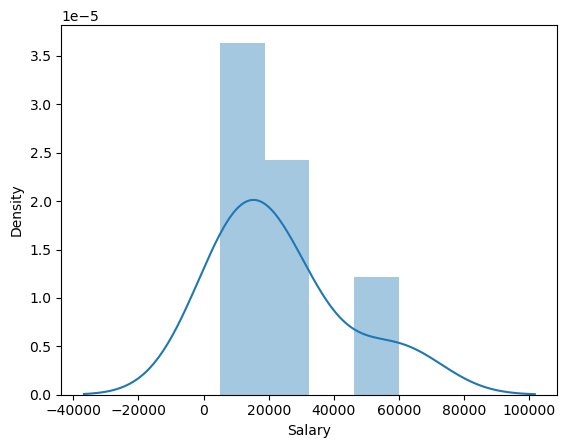

In [66]:
vis1 = sns.distplot(clean_data['Salary'])

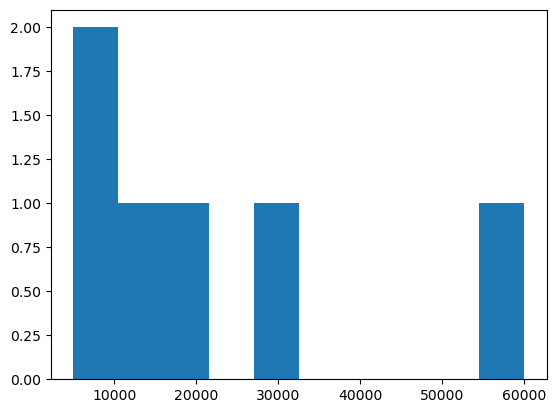

In [67]:
vis2 = plt.hist(clean_data['Salary'])

## `3. Bivariate Analysis`

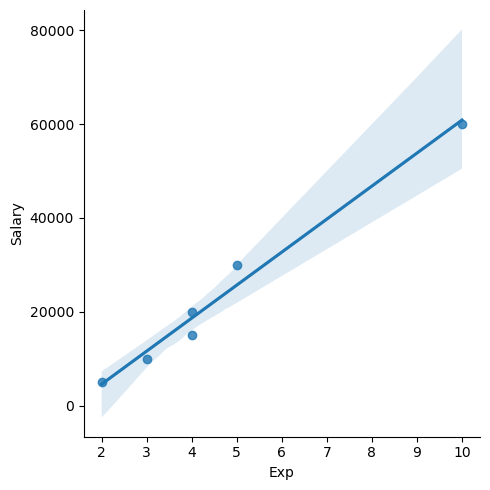

In [73]:
 vis3 = sns.lmplot(data = clean_data, x = 'Exp', y = 'Salary', fit_reg=True )

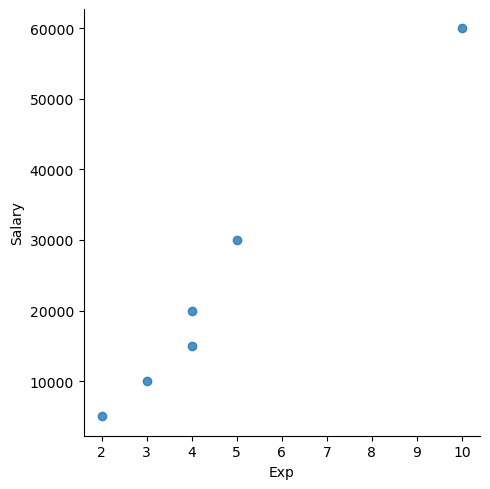

In [75]:
vis4 = sns.lmplot(data = clean_data, x = 'Exp', y = 'Salary', fit_reg= False)

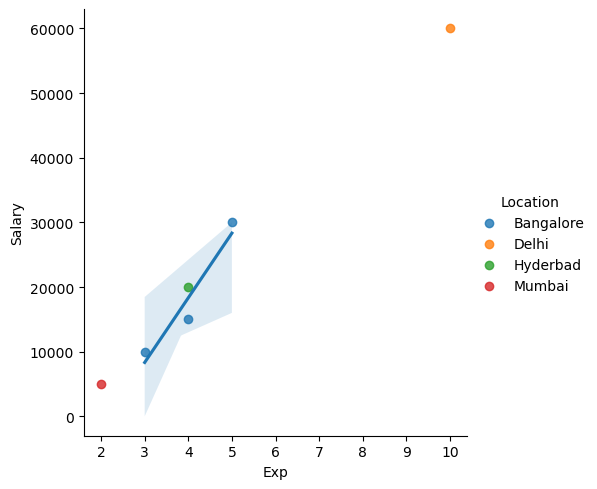

In [78]:
vis5 = sns.lmplot(data = clean_data, x = 'Exp', y = 'Salary', fit_reg= True, hue = 'Location')

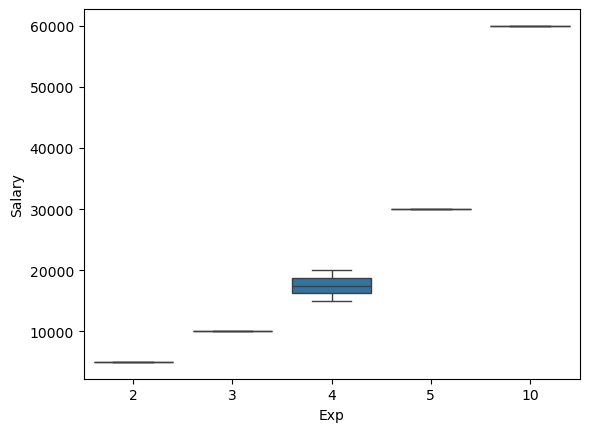

In [81]:
vis6 = sns.boxplot(data = clean_data, x = 'Exp',y = 'Salary')

## `4. Variable Identification`

In [82]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [83]:
y_dv = clean_data['Salary']
y_dv

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int64

In [84]:
x_id = clean_data[['Name', 'Domain', 'Age', 'Location', 'Exp']]

In [85]:
x_id

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


## `5. Imputation Techniques`

In [86]:
imputation = pd.get_dummies(clean_data, dtype=int)
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [88]:
imputation.columns

Index(['Age', 'Salary', 'Exp', 'Name_Jane', 'Name_Kim', 'Name_Mike',
       'Name_Teddy', 'Name_Umar', 'Name_Uttam', 'Domain_Analytics',
       'Domain_Dataanalyst', 'Domain_Datascience', 'Domain_NLP',
       'Domain_Statistics', 'Domain_Testing', 'Location_Bangalore',
       'Location_Delhi', 'Location_Hyderbad', 'Location_Mumbai'],
      dtype='object')

In [89]:
len(imputation.columns)

19